# Classification

Classification is the supervised learning task of predicting the value of a categorical outcome ("class") variable, _y_, given real and/or categorical input ("feature") data, _X_. The objective of classification is to learn a model of the data that can be use to predict the correct class variable for new or unseen feature data.

A variety of classification algorithms exist. These algorithms have been developed under varying assumptions and employ different concepts. Each algorithm may interact with data differently based upon the size, dimensionality, and noise of the dataset, among other characteristics. These algorithms may have varying degrees of interpretability, variability, and bias.

Here, we'll use the `scikit-learn` (sklearn) package to expore the use of several classification algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [1]:
import numpy as np
import pandas as pd

file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name']
df_iris = pd.read_csv(file_url, names=col_names, header=None)

X = df_iris.iloc[:, :2]  # features
y = df_iris.iloc[:, -1]  # class

We can print some of the feature and the class values.

In [2]:
print(X.head())
print()
print(y.head())

   Sepal Length  Sepal Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


All `sklearn` classification algorithms require that the class values be represented as numbers. We can use the `LabelEncoder` function to convert the string class labels to corresponding integers.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Now we can separate the data into training and testing sets. We can fit the model on the training data and then evaluate it on the separate testing data. Let's save 20% of our data for testing, and use the rest for fitting our models.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We'll use `matplotlib` to visualize the decision boundaries. We'll create a meshgrid of matrix of feature values to do this.

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a mesh of shape [x_min, m_max]x[y_min, y_max].
h = .05  # step size in the mesh
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Now let's apply some classification methods to the data.

## Decision Tree

Let's fit a decision tree classifier.

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
y_pred = clf_dtc.predict(X_test)
print(np.average(y_test == y_pred))

0.6


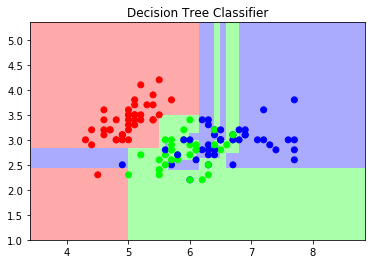

In [8]:
# Predict a class value for each point in the mesh.
Z = clf_dtc.predict(np.c_[xx.ravel(), yy.ravel()])

# Use the predictions to create a color plot.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree Classifier");

We can also visualize the paths of the decision tree. *Note that Graphviz is required.*

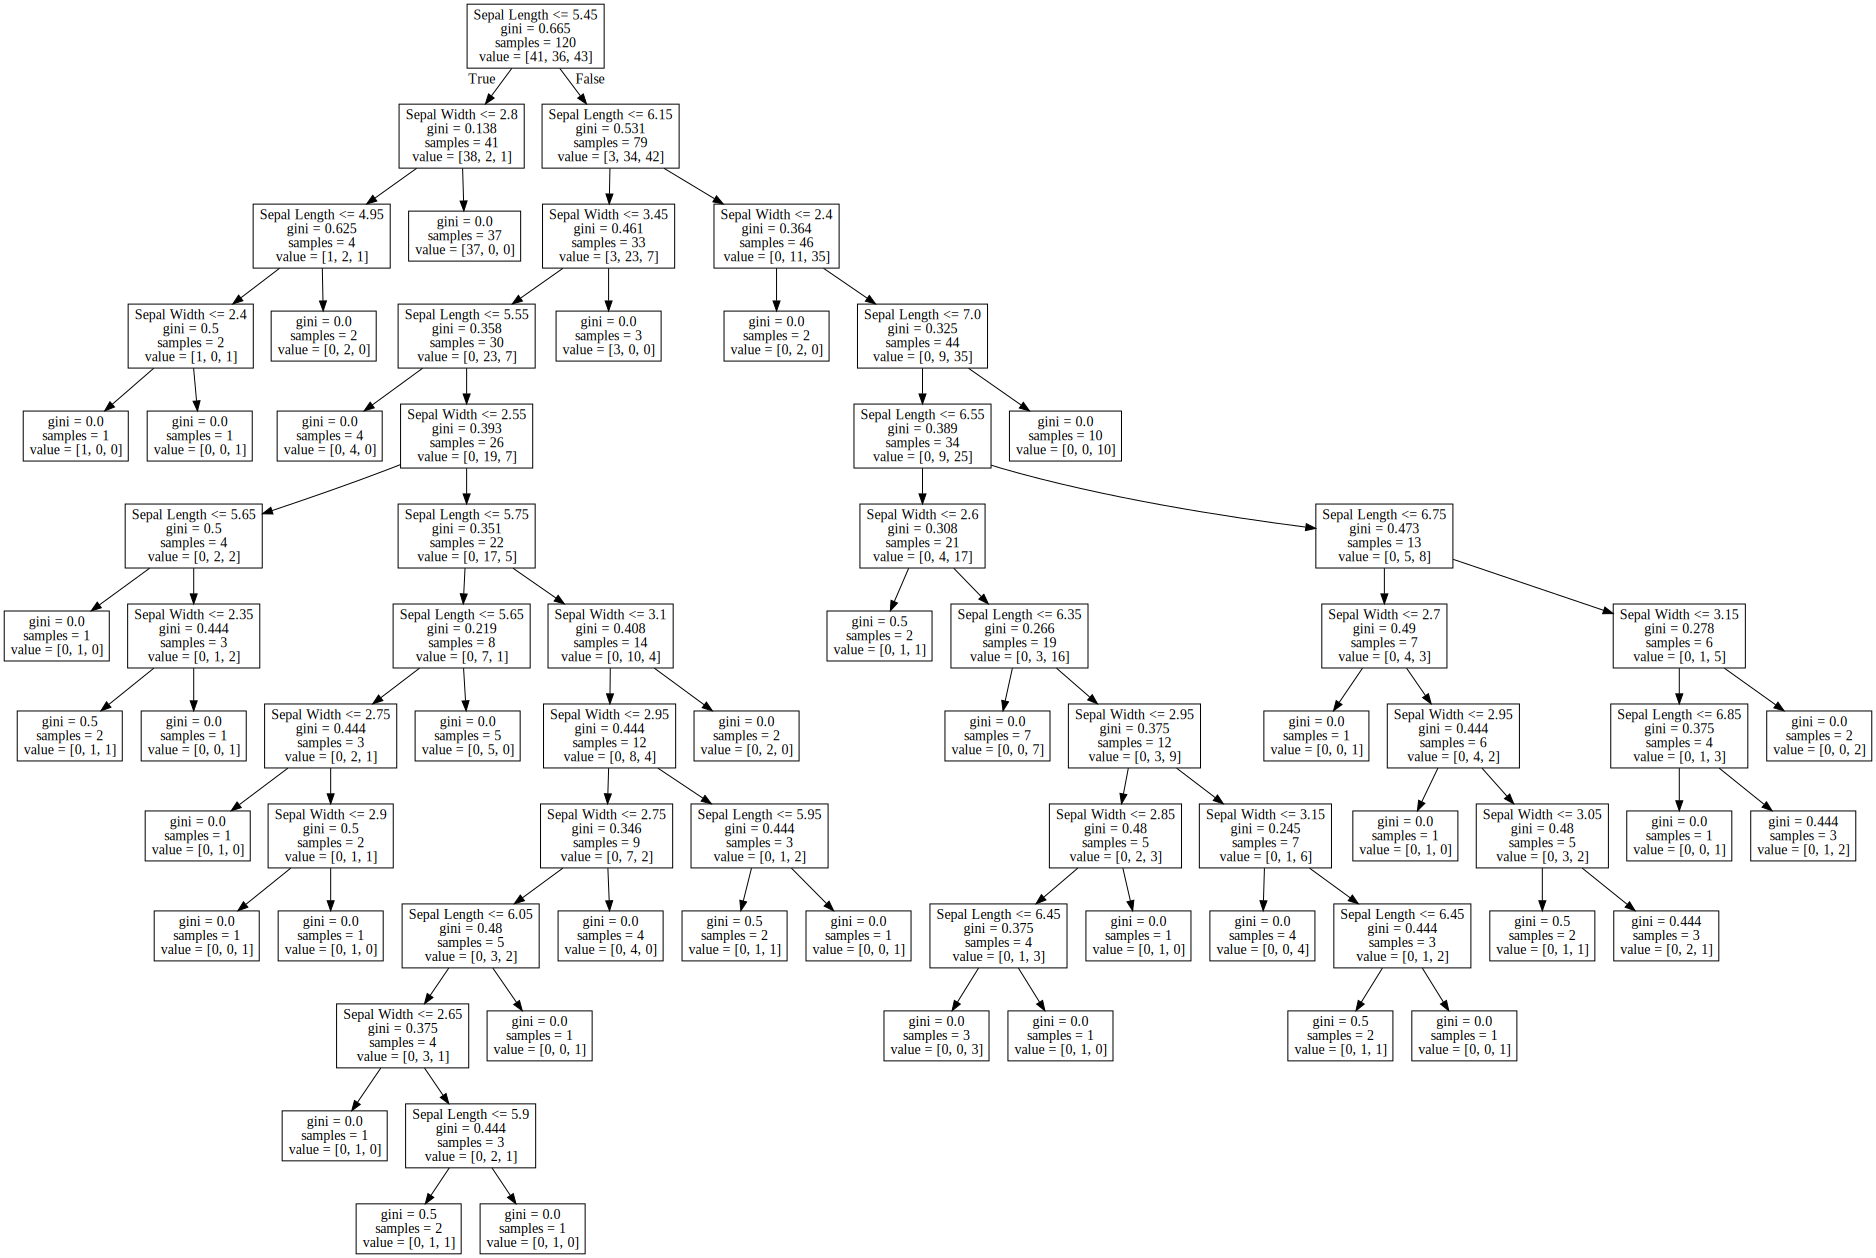

In [9]:
from graphviz import Source
from IPython.display import SVG
from sklearn.tree import export_graphviz

# Visualize the tree. Requires Graphviz to be installed.
graph = Source(export_graphviz(clf_dtc, out_file=None, feature_names=X.iloc[:, :2].columns))
SVG(graph.pipe(format='svg'))

## Gaussian Naive Bayes

Let's fit a Gaussian naive Bayes classifier.

In [10]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X, y)

GaussianNB(priors=None)

In [11]:
y_pred = clf_gnb.predict(X_test)
print(np.average(y_test == y_pred))

0.7666666666666667


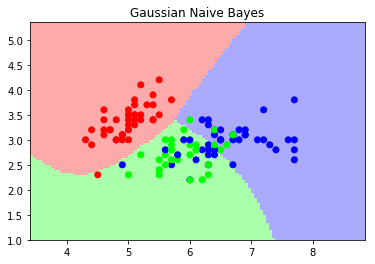

In [12]:
# Predict a class value for each point in the mesh.
Z = clf_gnb.predict(np.c_[xx.ravel(), yy.ravel()])

# Use the predictions to create a color plot.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Gaussian Naive Bayes");

Let's view the online results of Gaussian naive Bayes. As an iterative classifier, we can use `matplotlib`'s animation functions to view how the algorithm learns over the course of many iterations. *Note that FFmpeg is required.*

<IPython.core.display.Javascript object>


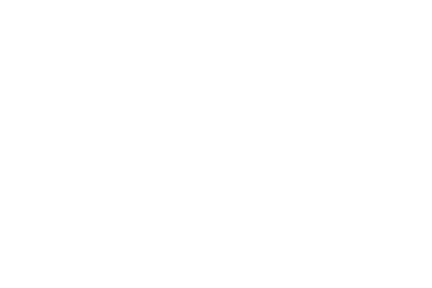

<IPython.core.display.Javascript object>


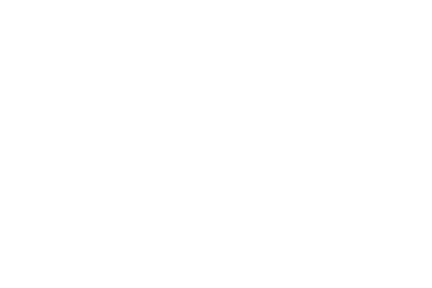

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc

# Set up the figure, the axis, and plot elements.
fig, ax = plt.subplots()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Perceptron Classifier")

def init():
    """Initialization function."""
    clf_gnb.partial_fit(X_train, y_train)

def animate(i):
    """Animation function. This is called sequentially."""
    clf_gnb.partial_fit(X_train, y_train)

    Z = clf_gnb.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points.
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)

    return ax

# Call the animator.
anim = animation.FuncAnimation(fig, func=animate, frames=25, init_func=init)

HTML(anim.to_html5_video());  # requires ffmpeg to be installed

## Housing Dataset

Let's practice applying what we've learned to a house price dataset for Ames, Iowa. We'll try to predict whether the house price is "high" or "low".

In [14]:
df = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

### 1. Drop or fill missing values. Consider how to handle the following columns, which have many missing values: `Alley`, `Fence`, `Fireplace Qu`, `Misc Feature`, `Pool QC`.

In [15]:
df = df.drop(['Alley', 'Fence', 'Fireplace Qu', 'Misc Feature', 'Pool QC'], 1)
df = df.dropna()

### 2. Separate the features and the class. Here, our class is the last column `SalePrice`.

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### 3. Transform the features to dummy variables.

In [17]:
X = pd.get_dummies(X)

### 4. Bin the SalePrice into two outcomes, 'high' or 'low'. Make them roughly balanced.

In [18]:
class_names = ['Low', 'High']
y_bin = pd.qcut(df['SalePrice'], 2, labels=class_names)
print(X.shape, y_bin.shape)
print(y_bin.head(10))

(2218, 270) (2218,)
0    High
1     Low
2    High
3    High
4    High
5    High
6    High
7    High
8    High
9    High
Name: SalePrice, dtype: category
Categories (2, object): [Low < High]


### 5. Split the dataset into 80% training data and 20% testing data. Each row should consist of the features, `X`, and the binned sales price, `y`.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2)

### 6. Fit three models, decision trees with a max depth of 2, 4, 8. Fit them all on the training data. Use all of the feature data to predict the class.

In [26]:
clf1 = DecisionTreeClassifier(max_depth=2)
clf2 = DecisionTreeClassifier(max_depth=4)
clf3 = DecisionTreeClassifier(max_depth=16)

clf1.fit(X_train, y_train);
clf2.fit(X_train, y_train);
clf3.fit(X_train, y_train);

### 6. Compare the accuracy of the decision tree classifiers on the test data. 

In [27]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

print("Decision Tree (max_depth=2):  ", round(np.average(y_test == y_pred1), 3))
print("Decision Tree (max_depth=4): ", round(np.average(y_test == y_pred2), 3))
print("Decision Tree (max_depth=8):", round(np.average(y_test == y_pred3), 3))

Decision Tree (max_depth=2):   0.878
Decision Tree (max_depth=4):  0.89
Decision Tree (max_depth=8): 0.894


### 7. Now fit a Gaussian naive Bayes classifier on the training data. Compare the accuray of the decision tree and the Gaussian naive Bayes classifiers. Which performs best?

In [28]:
clf4 = GaussianNB()
clf4.fit(X_train, y_train)

y_pred4 = clf4.predict(X_test)
print("Gaussian Naive Bayes:", round(np.average(y_test == y_pred4), 3))

Gaussian Naive Bayes: 0.619


### 8. Now fit a Multinomial naive Bayes classifier on the training data. How does the accuray of the model compare to the Gaussian naive Bayes classifier? Are there any implications of this result?

In [29]:
from sklearn.naive_bayes import MultinomialNB

clf5 = MultinomialNB()
clf5.fit(X_train, y_train)

y_pred5 = clf5.predict(X_test)
print("Multinomial Naive Bayes:", round(np.average(y_test == y_pred5), 3))

Multinomial Naive Bayes: 0.664
